In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## import data

In [260]:
cluster_data_import = pd.read_csv('sf18_weathermerged_distancemerged.csv')
cluster_data_import.head()

,Unnamed: 0,starttime_weather,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,...,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,max_temp,min_temp,precip,month,distance [km],speed [km/h]
0,0,2018-01-31 22:00:00,2018-01-31 22:52:36,2018-02-01 19:47:20,120,285,Mission Dolores Park,Webster St at O'Farrell St,2765,Subscriber,...,37.761420,-122.426435,37.783521,-122.431158,16.7,16.7,0.0,1,2.490689,0.119102
1,1,2018-01-31 22:00:00,2018-01-31 22:58:45,2018-02-01 00:46:42,236,160,Market St at 8th St,West Oakland BART Station,1306,Customer,...,37.803686,-122.282497,37.805318,-122.294837,16.7,16.7,0.0,1,1.098487,0.610553
2,2,2018-01-31 22:00:00,2018-01-31 22:53:42,2018-01-31 23:08:22,123,145,Folsom St at 19th St,29th St at Church St,3725,Subscriber,...,37.760594,-122.414817,37.743684,-122.426806,16.7,16.7,0.0,1,2.154200,8.812637
3,3,2018-01-31 22:00:00,2018-01-31 22:45:38,2018-01-31 23:05:48,285,133,Webster St at O'Farrell St,Valencia St at 22nd St,1059,Subscriber,...,37.783521,-122.431158,37.755213,-122.420975,16.7,16.7,0.0,1,3.270451,9.730268
4,4,2018-01-31 22:00:00,2018-01-31 22:53:28,2018-01-31 23:03:21,202,195,Washington St at 8th St,Bay Pl at Vernon St,1834,Customer,...,37.800754,-122.274894,37.812314,-122.260779,16.7,16.7,0.0,1,1.784961,10.836190


In [248]:
cluster_data_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1791050 entries, 0 to 1791049
Data columns (total 27 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   starttime_weather        object 
 2   start_time               object 
 3   end_time                 object 
 4   start_station_id         int64  
 5   end_station_id           int64  
 6   start_station_name       object 
 7   end_station_name         object 
 8   bike_id                  int64  
 9   user_type                object 
 10  duration [s]             float64
 11  Date_s                   object 
 12  Weekday_s                int64  
 13  Hour_s                   int64  
 14  Date_e                   object 
 15  Weekday_e                int64  
 16  Hour_e                   int64  
 17  start_station_latitude   float64
 18  start_station_longitude  float64
 19  end_station_latitude     float64
 20  end_station_longitude    float64
 21  max_temp

In [249]:
cluster_data = cluster_data_import.loc[:, ~cluster_data_import.columns.str.contains('^Unnamed')]
cluster_data.head()

,starttime_weather,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration [s],...,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,max_temp,min_temp,precip,month,distance [km],speed [km/h]
0,2018-01-31 22:00:00,2018-01-31 22:52:36,2018-02-01 19:47:20,120,285,Mission Dolores Park,Webster St at O'Farrell St,2765,Subscriber,75284.0,...,37.761420,-122.426435,37.783521,-122.431158,16.7,16.7,0.0,1,2.490689,0.119102
1,2018-01-31 22:00:00,2018-01-31 22:58:45,2018-02-01 00:46:42,236,160,Market St at 8th St,West Oakland BART Station,1306,Customer,6477.0,...,37.803686,-122.282497,37.805318,-122.294837,16.7,16.7,0.0,1,1.098487,0.610553
2,2018-01-31 22:00:00,2018-01-31 22:53:42,2018-01-31 23:08:22,123,145,Folsom St at 19th St,29th St at Church St,3725,Subscriber,880.0,...,37.760594,-122.414817,37.743684,-122.426806,16.7,16.7,0.0,1,2.154200,8.812637
3,2018-01-31 22:00:00,2018-01-31 22:45:38,2018-01-31 23:05:48,285,133,Webster St at O'Farrell St,Valencia St at 22nd St,1059,Subscriber,1210.0,...,37.783521,-122.431158,37.755213,-122.420975,16.7,16.7,0.0,1,3.270451,9.730268
4,2018-01-31 22:00:00,2018-01-31 22:53:28,2018-01-31 23:03:21,202,195,Washington St at 8th St,Bay Pl at Vernon St,1834,Customer,593.0,...,37.800754,-122.274894,37.812314,-122.260779,16.7,16.7,0.0,1,1.784961,10.836190


### count bike used every hour

In [250]:
starttime_weather_count = cluster_data
starttime_weather_count=cluster_data['starttime_weather'].value_counts()
df_starttime_weather_count=pd.DataFrame(starttime_weather_count)
df_starttime_weather_count=df_starttime_weather_count.reset_index()
df_starttime_weather_count.columns=['starttime_weather', 'bikes_on_use']
df_starttime_weather_count

,starttime_weather,bikes_on_use
0,2018-10-10 08:00:00,2056
1,2018-07-16 17:00:00,2016
2,2018-07-30 17:00:00,1984
3,2018-07-24 17:00:00,1970
4,2018-06-25 17:00:00,1964
...,...,...
8267,2018-08-06 02:00:00,1
8268,2018-01-15 03:00:00,1
8269,2018-01-28 04:00:00,1
8270,2018-03-09 03:00:00,1


### merge it unto imported data

In [251]:
hourly_merged = pd.merge(cluster_data, df_starttime_weather_count, on='starttime_weather')
hourly_merged

,starttime_weather,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration [s],...,start_station_longitude,end_station_latitude,end_station_longitude,max_temp,min_temp,precip,month,distance [km],speed [km/h],bikes_on_use
0,2018-01-31 22:00:00,2018-01-31 22:52:36,2018-02-01 19:47:20,120,285,Mission Dolores Park,Webster St at O'Farrell St,2765,Subscriber,75284.0,...,-122.426435,37.783521,-122.431158,16.7,16.7,0.0,1,2.490689,0.119102,60
1,2018-01-31 22:00:00,2018-01-31 22:58:45,2018-02-01 00:46:42,236,160,Market St at 8th St,West Oakland BART Station,1306,Customer,6477.0,...,-122.282497,37.805318,-122.294837,16.7,16.7,0.0,1,1.098487,0.610553,60
2,2018-01-31 22:00:00,2018-01-31 22:53:42,2018-01-31 23:08:22,123,145,Folsom St at 19th St,29th St at Church St,3725,Subscriber,880.0,...,-122.414817,37.743684,-122.426806,16.7,16.7,0.0,1,2.154200,8.812637,60
3,2018-01-31 22:00:00,2018-01-31 22:45:38,2018-01-31 23:05:48,285,133,Webster St at O'Farrell St,Valencia St at 22nd St,1059,Subscriber,1210.0,...,-122.431158,37.755213,-122.420975,16.7,16.7,0.0,1,3.270451,9.730268,60
4,2018-01-31 22:00:00,2018-01-31 22:53:28,2018-01-31 23:03:21,202,195,Washington St at 8th St,Bay Pl at Vernon St,1834,Customer,593.0,...,-122.274894,37.812314,-122.260779,16.7,16.7,0.0,1,1.784961,10.836190,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791045,2018-12-01 00:00:00,2018-12-01 00:11:55,2018-12-01 00:19:49,345,81,Hubbell St at 16th St,Berry St at 4th St,3035,Subscriber,474.0,...,-122.398295,37.775880,-122.393170,15.0,15.0,0.0,12,1.138059,8.643485,47
1791046,2018-12-01 00:00:00,2018-12-01 00:02:49,2018-12-01 00:16:50,10,58,Washington St at Kearny St,Market St at 10th St,2034,Subscriber,841.0,...,-122.404770,37.776619,-122.417385,15.0,15.0,0.0,12,2.362164,10.111523,47
1791047,2018-12-01 00:00:00,2018-12-01 00:05:28,2018-12-01 00:09:48,245,255,Downtown Berkeley BART,Virginia St at Shattuck Ave,2243,Subscriber,260.0,...,-122.267764,37.876573,-122.269528,15.0,15.0,0.0,12,0.708836,9.814658,47
1791048,2018-12-01 00:00:00,2018-12-01 00:03:07,2018-12-01 00:08:00,93,126,4th St at Mission Bay Blvd S,Esprit Park,545,Subscriber,293.0,...,-122.391198,37.761634,-122.390648,15.0,15.0,0.0,12,0.976111,11.993176,47


In [252]:
hourly_merged.columns.values.tolist() 

['starttime_weather',
 'start_time',
 'end_time',
 'start_station_id',
 'end_station_id',
 'start_station_name',
 'end_station_name',
 'bike_id',
 'user_type',
 'duration [s]',
 'Date_s',
 'Weekday_s',
 'Hour_s',
 'Date_e',
 'Weekday_e',
 'Hour_e',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_latitude',
 'end_station_longitude',
 'max_temp',
 'min_temp',
 'precip',
 'month',
 'distance [km]',
 'speed [km/h]',
 'bikes_on_use']

### Data Scaling

In [253]:
cluster1= hourly_merged[['bikes_on_use','Weekday_s','Date_s','Hour_s','max_temp','precip']]
#cluster.drop_duplicates(['Date_s'])
cluster2=cluster1.drop_duplicates(['Date_s','Hour_s'])
cluster = cluster2.drop(['Date_s'],axis=1)
cluster

,bikes_on_use,Weekday_s,Hour_s,max_temp,precip
0,60,2,22,16.7,0.0
60,291,2,16,6.7,0.0
351,133,2,14,6.1,0.0
484,252,2,19,13.3,0.0
736,20,2,23,18.3,0.0
...,...,...,...,...,...
1790934,6,5,4,12.2,0.0
1790940,8,5,3,12.8,0.0
1790948,38,5,1,13.9,0.0
1790986,17,5,2,13.3,0.0


In [254]:
X = cluster.drop("Hour_s", axis=1)

y = cluster["Hour_s"]
X.head()

,bikes_on_use,Weekday_s,max_temp,precip
0,60,2,16.7,0.0
60,291,2,6.7,0.0
351,133,2,6.1,0.0
484,252,2,13.3,0.0
736,20,2,18.3,0.0


In [255]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# create a df out of array
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df.head()

,bikes_on_use,Weekday_s,max_temp,precip
0,-0.635158,-0.504635,0.664940,-0.174338
60,0.302242,-0.504635,-1.816993,-0.174338
351,-0.338923,-0.504635,-1.965909,-0.174338
484,0.143980,-0.504635,-0.178917,-0.174338
736,-0.797479,-0.504635,1.062049,-0.174338


In [256]:
sf_scaled = X_scaled_df
sf_scaled["Hour_s"] = cluster_b["Hour_s"]

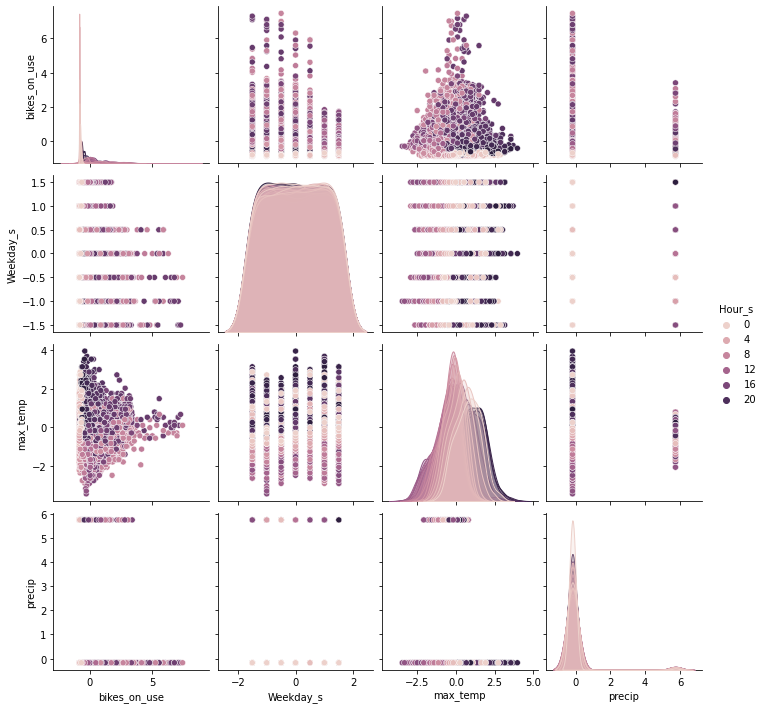

In [257]:
sns.pairplot(data=sf_scaled, hue="Hour_s")

In [274]:
cluster1= hourly_merged[['bikes_on_use','Weekday_s','Date_s','Hour_s','max_temp','precip']]
#cluster.drop_duplicates(['Date_s'])
cluster2=cluster1.drop_duplicates(['Date_s','Hour_s'])
cluster3 = cluster2.drop(['Date_s'],axis=1)
cluster4 = cluster3.drop(['precip'],axis=1)
cluster = cluster4.drop(['Weekday_s'],axis=1)
cluster


,bikes_on_use,Hour_s,max_temp
0,60,22,16.7
60,291,16,6.7
351,133,14,6.1
484,252,19,13.3
736,20,23,18.3
...,...,...,...
1790934,6,4,12.2
1790940,8,3,12.8
1790948,38,1,13.9
1790986,17,2,13.3


In [275]:
X = cluster.drop("Hour_s", axis=1)

y = cluster["Hour_s"]
X.head()

,bikes_on_use,max_temp
0,60,16.7
60,291,6.7
351,133,6.1
484,252,13.3
736,20,18.3


In [276]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# create a df out of array
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df.head()

,bikes_on_use,max_temp
0,-0.635158,0.664940
60,0.302242,-1.816993
351,-0.338923,-1.965909
484,0.143980,-0.178917
736,-0.797479,1.062049


In [277]:
sf_scaled = X_scaled_df
sf_scaled["Hour_s"] = cluster_b["Hour_s"]

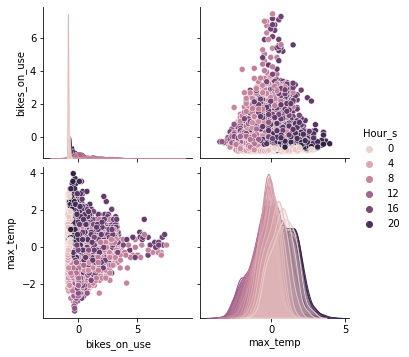

In [278]:
sns.pairplot(data=sf_scaled, hue="Hour_s")

### K-Means

In [279]:
from sklearn.cluster import KMeans

In [280]:
k_max = 20

clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1)
    model.fit(X_scaled)
    clusters.append(k+1)
    losses.append(model.inertia_)

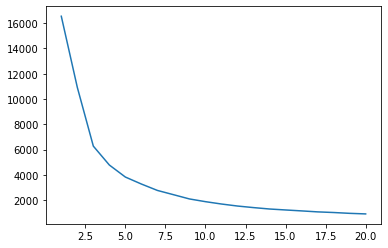

In [281]:
plt.plot(clusters, losses)
plt.show()

(0.0, 10.0)

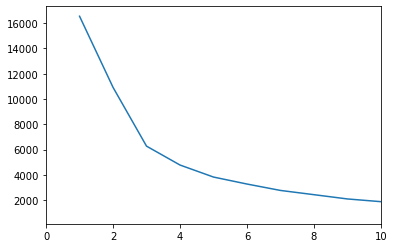

In [282]:
plt.plot(clusters, losses)
plt.xlim([0,10])

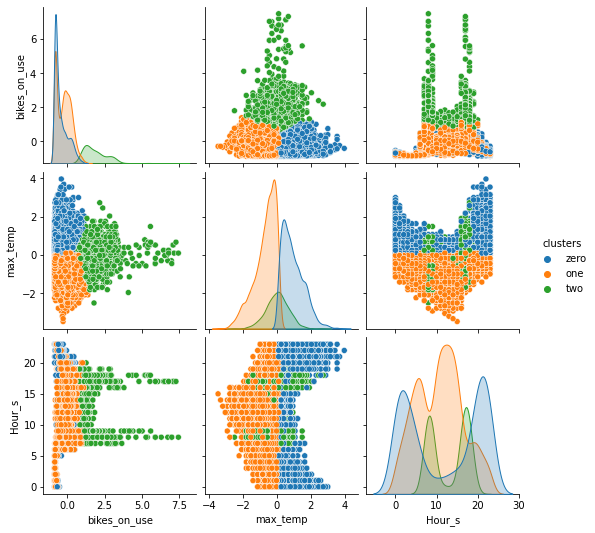

In [283]:
numbers = ["zero", "one", "two", "three","four","five"]
three_means = KMeans(n_clusters=3)
three_means.fit(X_scaled)
sf_scaled["clusters"] = three_means.predict(X_scaled)
sf_scaled["clusters"] = sf_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=sf_scaled, hue="clusters")